In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
import pickle
import os

In [40]:
file_path = 'D:\\GUVI\\Assesments\\Mental_Health_Survey\\CSV\\cleaned_data.csv'

In [41]:
data = pd.read_csv(file_path)

In [42]:
data.head()

,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Female,49,Ludhiana,Working Professional,Chef,0,5,0.00,0,2,6-8 hours,Healthy,BHM,No,1,2,No,0
1,Male,26,Varanasi,Working Professional,Teacher,0,4,0.00,0,3,Less than 5 hours,Unhealthy,LLB,Yes,7,3,No,1
2,Male,33,Visakhapatnam,Student,Not Yet Disclosed,5,0,8.97,2,0,5-6 hours,Healthy,B.Pharm,Yes,3,1,No,1
3,Male,22,Mumbai,Working Professional,Teacher,0,5,0.00,0,1,Less than 5 hours,Moderate,BBA,Yes,10,1,Yes,1
4,Female,30,Kanpur,Working Professional,Business Analyst,0,1,0.00,0,1,5-6 hours,Unhealthy,BBA,Yes,9,4,Yes,0


In [43]:
data.shape

(135769, 18)

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135769 entries, 0 to 135768
Data columns (total 18 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   Gender                                 135769 non-null  object 
 1   Age                                    135769 non-null  int64  
 2   City                                   135769 non-null  object 
 3   Working Professional or Student        135769 non-null  object 
 4   Profession                             135769 non-null  object 
 5   Academic Pressure                      135769 non-null  int64  
 6   Work Pressure                          135769 non-null  int64  
 7   CGPA                                   135769 non-null  float64
 8   Study Satisfaction                     135769 non-null  int64  
 9   Job Satisfaction                       135769 non-null  int64  
 10  Sleep Duration                         135769 non-null  

In [45]:
# Features Selection

numerical_features = data.select_dtypes(include = ['int64','float64'])
categorical_features = data.select_dtypes(include = 'object')

======================================= Age =======================================


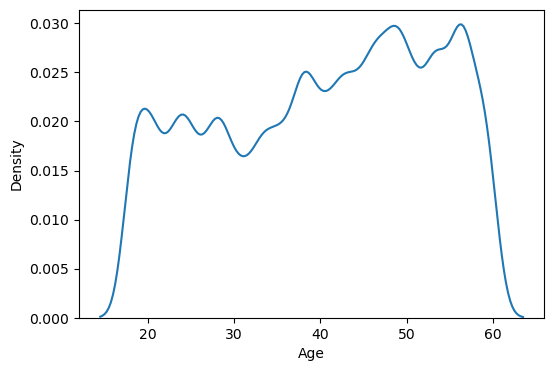

======================================= Academic Pressure =======================================


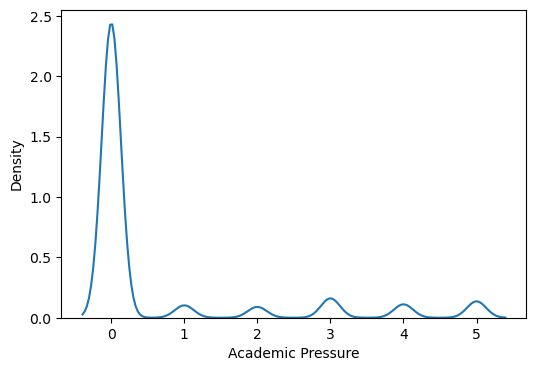

======================================= Work Pressure =======================================


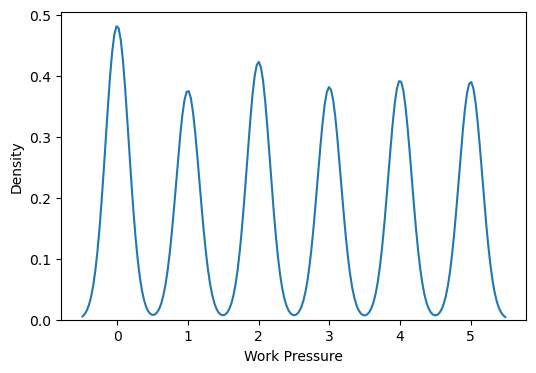

======================================= CGPA =======================================


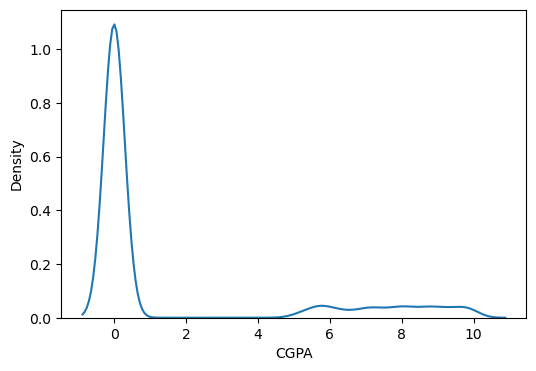

======================================= Study Satisfaction =======================================


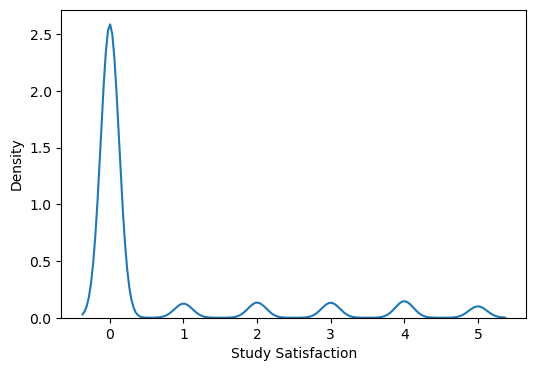

======================================= Job Satisfaction =======================================


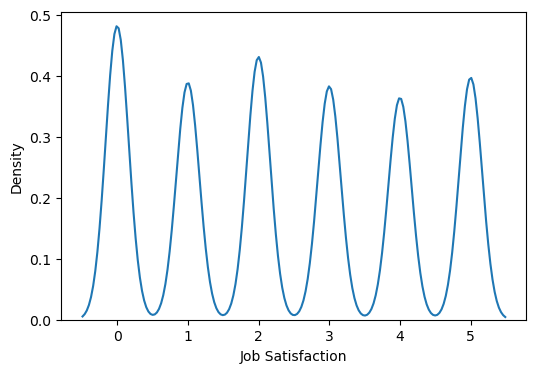

======================================= Work/Study Hours =======================================


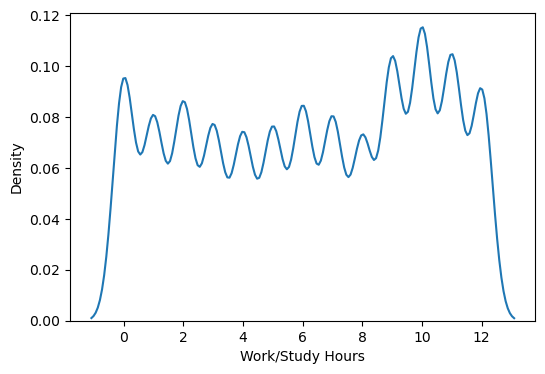

======================================= Financial Stress =======================================


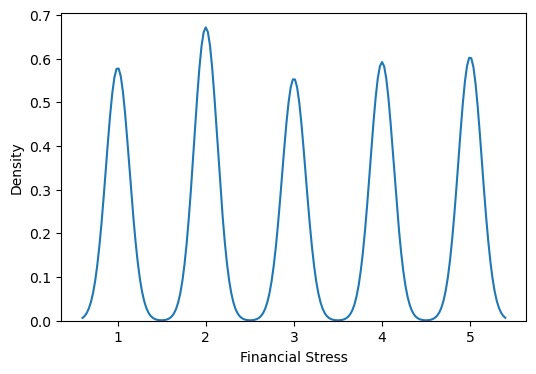

======================================= Depression =======================================


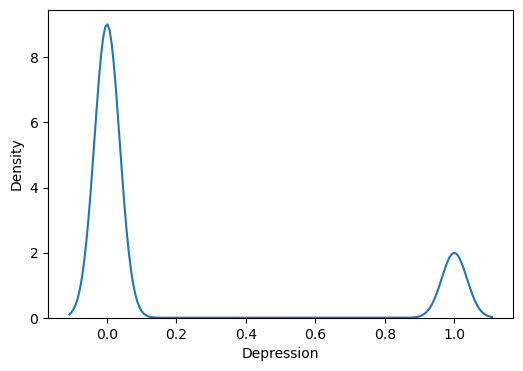

In [46]:
for i in numerical_features:
    plt.figure(figsize = (6,4))
    sns.kdeplot(data[i])
    print('======================================= ' + i + ' =======================================')
    plt.show()

In [47]:
# Correlation

corr = numerical_features.corr()

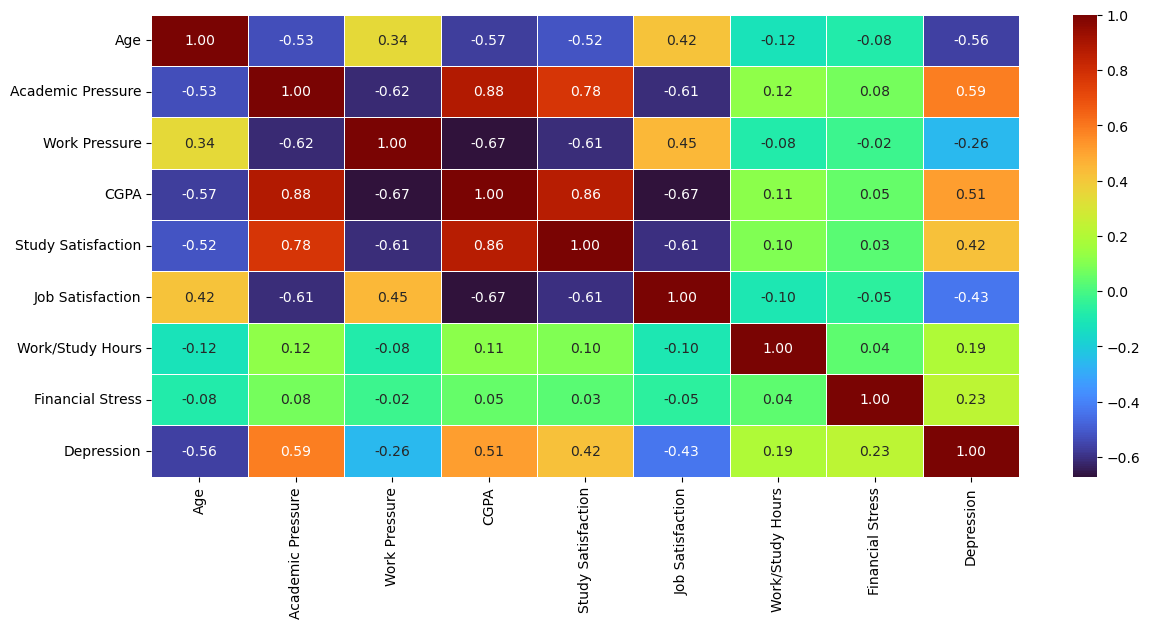

In [48]:
plt.figure(figsize = (14,6))

sns.heatmap(corr, cmap = 'turbo', annot = True, fmt = '.2f', linewidths = 0.5)

plt.show()


In [49]:
# Numerical Feature Selection

corr[abs(corr) > 0.6]

,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Depression
Age,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Academic Pressure,NaN,1.000000,-0.617388,0.876001,0.776152,-0.612365,NaN,NaN,NaN
Work Pressure,NaN,-0.617388,1.000000,-0.672227,-0.610918,NaN,NaN,NaN,NaN
CGPA,NaN,0.876001,-0.672227,1.000000,0.864792,-0.666749,NaN,NaN,NaN
Study Satisfaction,NaN,0.776152,-0.610918,0.864792,1.000000,-0.605938,NaN,NaN,NaN
Job Satisfaction,NaN,-0.612365,NaN,-0.666749,-0.605938,1.000000,NaN,NaN,NaN
Work/Study Hours,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
Financial Stress,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
Depression,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [50]:
corr.where(np.triu(np.ones(corr.shape), k = 1).astype(bool)).stack().reset_index()

,level_0,level_1,0
0,Age,Academic Pressure,-0.530250
1,Age,Work Pressure,0.344741
2,Age,CGPA,-0.570884
3,Age,Study Satisfaction,-0.518355
4,Age,Job Satisfaction,0.415608
5,Age,Work/Study Hours,-0.118010
6,Age,Financial Stress,-0.083578
7,Age,Depression,-0.564844
8,Academic Pressure,Work Pressure,-0.617388
9,Academic Pressure,CGPA,0.876001


In [51]:
pair_corr = corr.where(np.triu(np.ones(corr.shape), k = 1).astype(bool)).stack().reset_index()

In [52]:
pair_corr[abs(pair_corr[0]) > 0.6]

,level_0,level_1,0
8,Academic Pressure,Work Pressure,-0.617388
9,Academic Pressure,CGPA,0.876001
10,Academic Pressure,Study Satisfaction,0.776152
11,Academic Pressure,Job Satisfaction,-0.612365
15,Work Pressure,CGPA,-0.672227
16,Work Pressure,Study Satisfaction,-0.610918
21,CGPA,Study Satisfaction,0.864792
22,CGPA,Job Satisfaction,-0.666749
26,Study Satisfaction,Job Satisfaction,-0.605938


In [53]:
corr_60 = pair_corr[abs(pair_corr[0]) > 0.6]

In [54]:
corr_60.columns = ['Primary','Secondary','Score']

In [55]:
corr_60.groupby(['Primary']).agg({
    "Secondary":'count'
}).sort_values('Secondary',ascending = False)

,Secondary
Primary,
Academic Pressure,4
CGPA,2
Work Pressure,2
Study Satisfaction,1


In [56]:
corr_60.groupby(['Primary']).agg({
    "Secondary":'count'
}).sort_values('Secondary',ascending = False).index

Index(['Academic Pressure', 'CGPA', 'Work Pressure', 'Study Satisfaction'], dtype='object', name='Primary')

In [57]:
col_to_drop = ['Academic Pressure', 'CGPA', 'Work Pressure', 'Study Satisfaction']

In [58]:
data.drop(col_to_drop, axis = 1, inplace = True)

In [59]:
# Categorical Feature Selection

col = []
counts = []

for i in data.select_dtypes(include = 'object').columns:
  col.append(i)
  counts.append(data[i].nunique())

In [60]:
pd.DataFrame({
    "col": col,
    "counts": counts
}).sort_values('counts', ascending = False)

,col,counts
3,Profession,39
1,City,29
6,Degree,28
4,Sleep Duration,4
5,Dietary Habits,3
0,Gender,2
2,Working Professional or Student,2
7,Have you ever had suicidal thoughts ?,2
8,Family History of Mental Illness,2


In [61]:
encoders = {}
for col in categorical_features:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    encoders[col] = le

In [62]:
corr_1 = data.corr()

In [63]:
pair_corr_1 = corr_1.where(np.triu(np.ones(corr_1.shape), k = 1).astype(bool)).stack().reset_index()

In [64]:
corr_60_1 = pair_corr_1[abs(pair_corr_1[0]) > 0.6]

In [65]:
corr_60_1.columns = ['Primary','Secondary','Score']

In [66]:
corr_60_1.groupby(['Primary']).agg({
    "Secondary":'count'
}).sort_values('Secondary',ascending = False)

,Secondary
Primary,
Working Professional or Student,1


In [67]:
corr_60_1.groupby(['Primary']).agg({
    "Secondary":'count'
}).sort_values('Secondary',ascending = False).index

Index(['Working Professional or Student'], dtype='object', name='Primary')

In [68]:
col_to_drop_1 = 'Working Professional or Student'

In [69]:
data.drop(col_to_drop_1, axis = 1, inplace = True)

==================  Gender  ==================


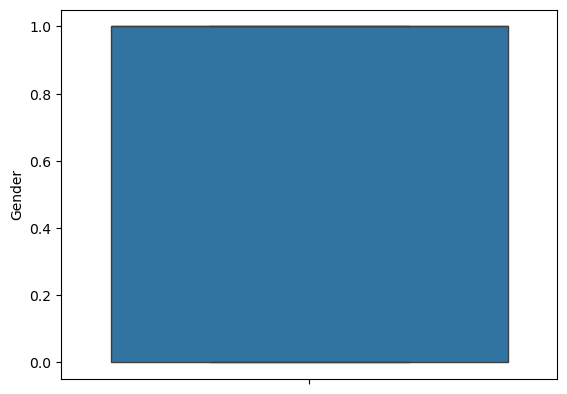

==================  Age  ==================


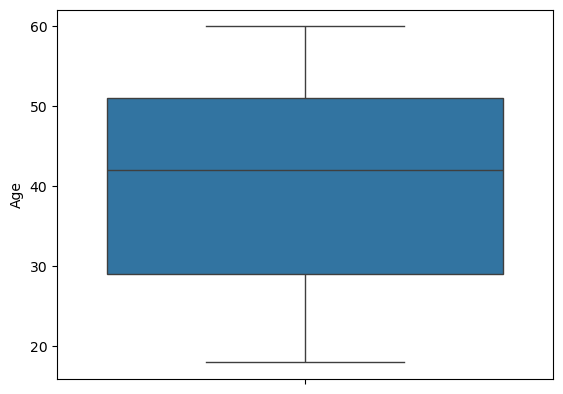

==================  City  ==================


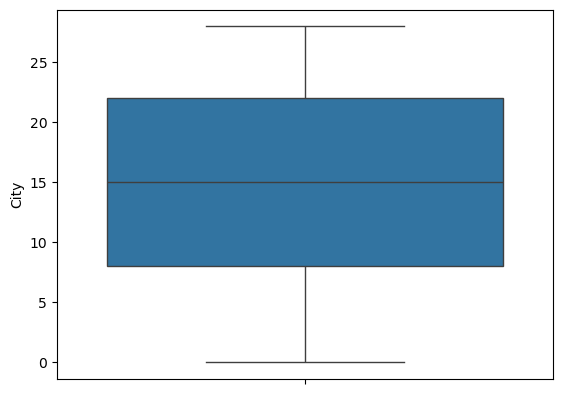

==================  Profession  ==================


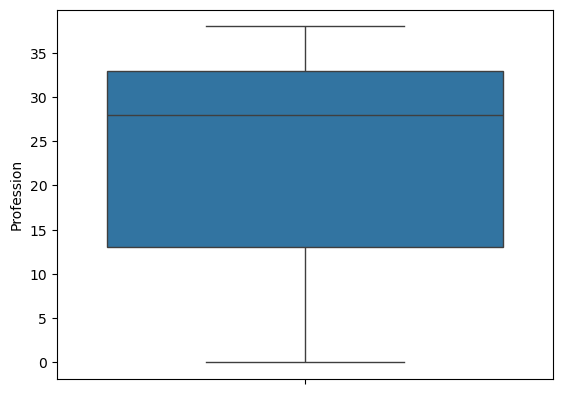

==================  Job Satisfaction  ==================


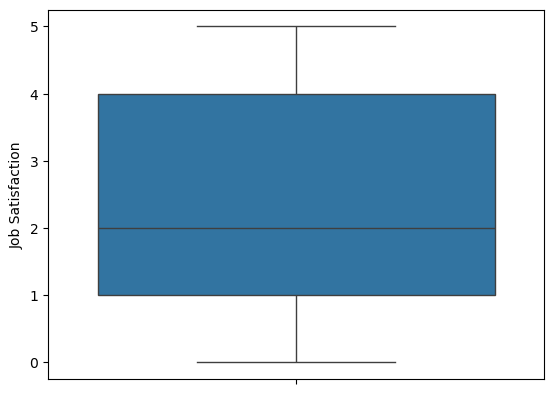

==================  Sleep Duration  ==================


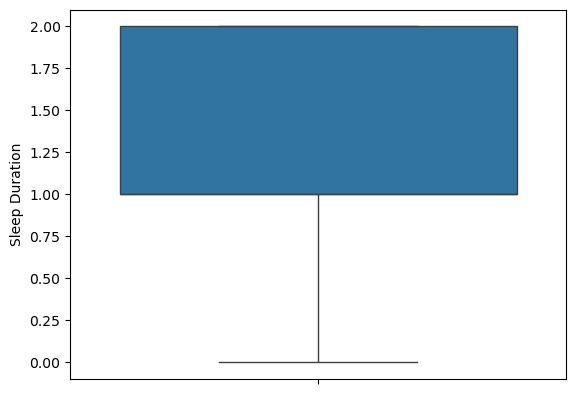

==================  Dietary Habits  ==================


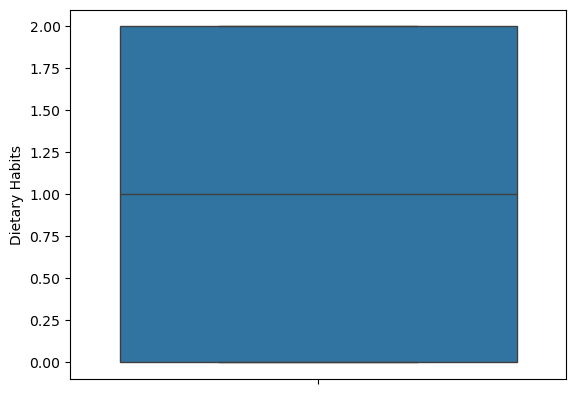

==================  Degree  ==================


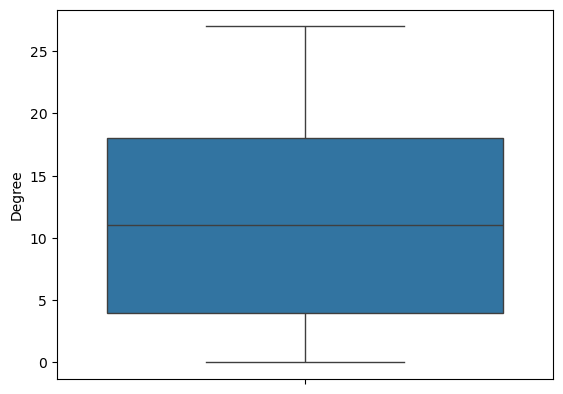

==================  Have you ever had suicidal thoughts ?  ==================


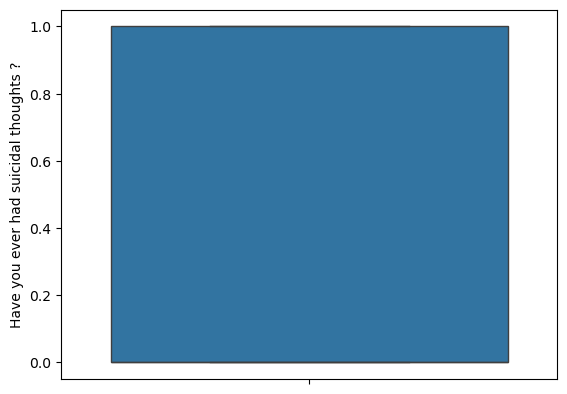

==================  Work/Study Hours  ==================


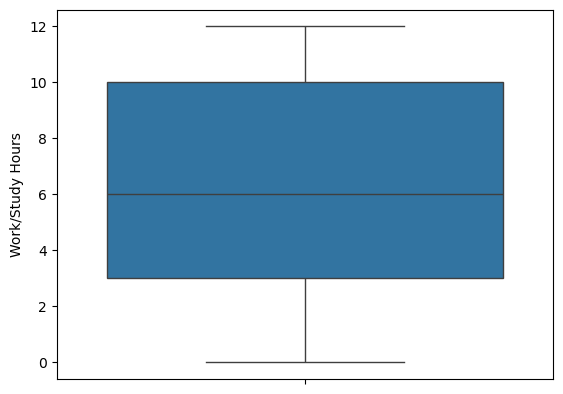

==================  Financial Stress  ==================


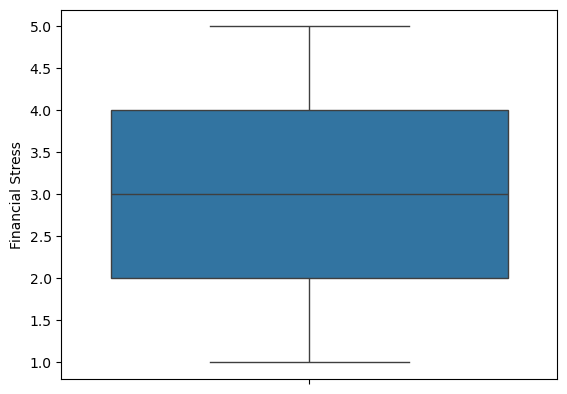

==================  Family History of Mental Illness  ==================


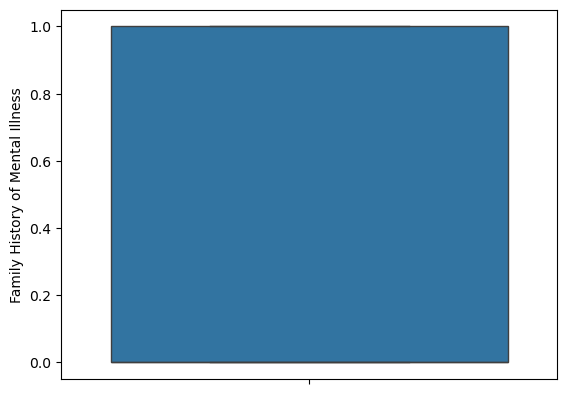

==================  Depression  ==================


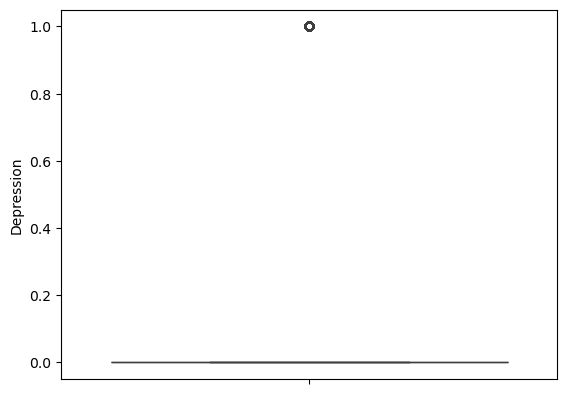

In [70]:
# Checking For Outliers

for i in data.columns:

  print("================== ", i," ==================")
  sns.boxplot(data[i].head(10000))
  plt.show()

In [71]:
# Data after Preprocessing

corr_1 = data.corr()

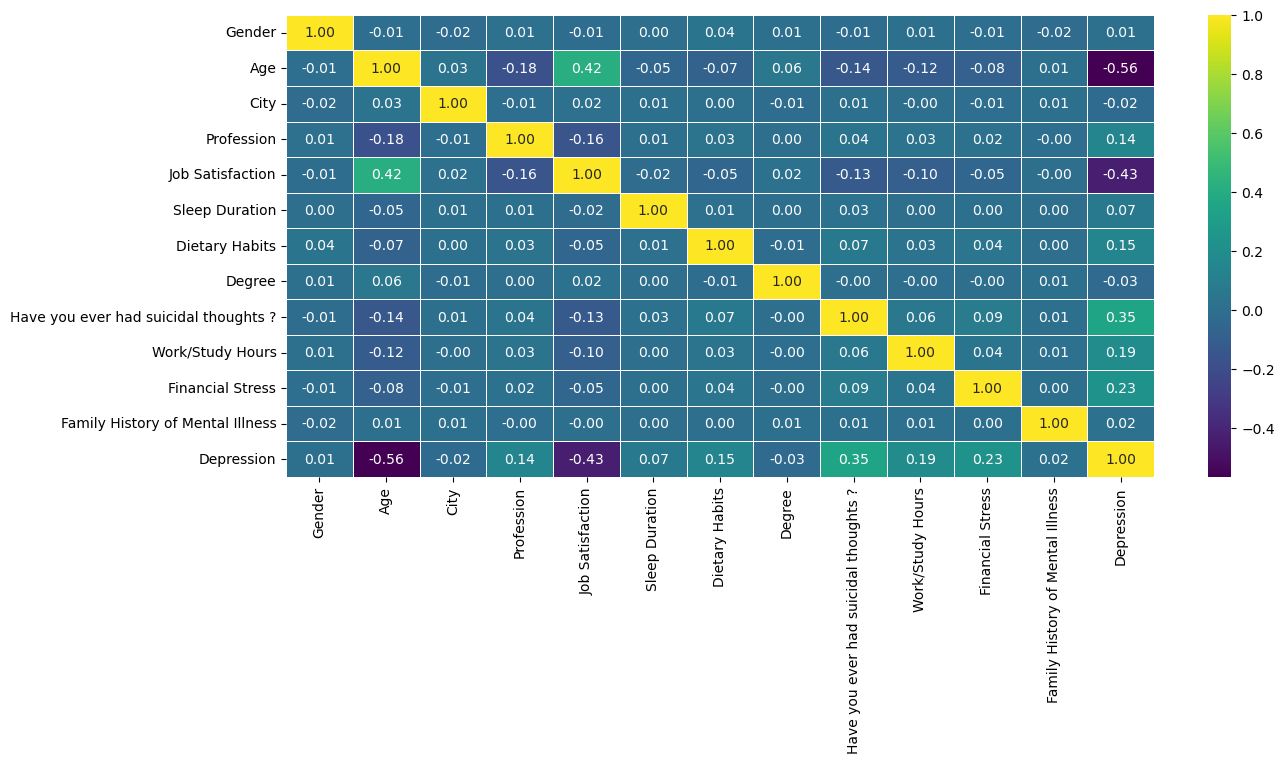

In [72]:
plt.figure(figsize = (14,6))

sns.heatmap(corr_1, cmap = 'viridis', annot = True, fmt = '.2f', linewidths = 0.5)

plt.show()

In [73]:
data.head()

,Gender,Age,City,Profession,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,49,15,4,2,1,0,9,0,1,2,0,0
1,1,26,26,36,3,2,2,12,1,7,3,0,1
2,1,33,28,28,0,0,0,3,1,3,1,0,1
3,1,22,17,36,1,2,1,6,1,10,1,1,1
4,0,30,12,3,1,0,2,6,1,9,4,1,0


In [77]:
preprocess_objects = {'encoders': encoders}

with open('D:\\GUVI\\Assesments\\Mental_Health_Survey\\Pickle\\preprocessor.pkl', 'wb') as f:
    pickle.dump(preprocess_objects, f)

In [79]:
data.to_csv('D:\\GUVI\\Assesments\\Mental_Health_Survey\\CSV\\preprocessed_data.csv')